In [56]:
!pip install wordcloud

In [2]:
import pandas as pd
path = r'/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(path)
sentiment = [1 if i=='positive' else 0 for i in    df['sentiment'].values]
df['sentiment'] = sentiment
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
df.shape

(50000, 2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'distribution of sentiment')

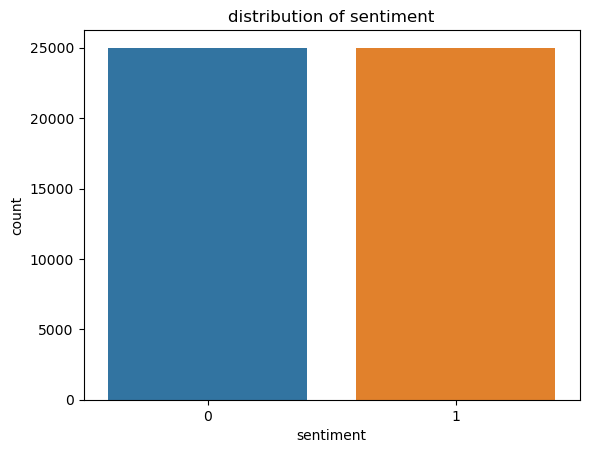

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['sentiment'])
plt.title('distribution of sentiment')

In [5]:
def len_text(text):
    return(len(text.split()))

In [6]:
df['Word Count'] = df['review'].apply(len_text)
df.head()

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [6]:
positive_word_counts = df[df['sentiment'] == 1]['Word Count']
negative_word_counts = df[df['sentiment'] == 0]['Word Count']

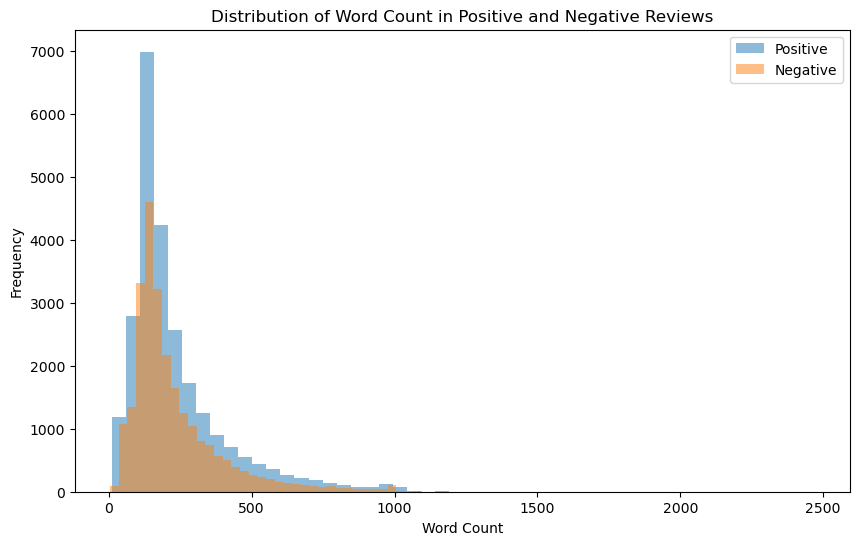

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(positive_word_counts, bins=50, alpha=0.5, label='Positive')
plt.hist(negative_word_counts, bins=50, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in Positive and Negative Reviews')
plt.legend()
plt.show()

In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))

def processing_text(text):
    text = text.lower()
    text = re.sub('<br />','',text)
    text = re.sub('http\S+','',text)
    try:words = (text).split()[:350]
    except:words = (text).split()
    wordsfinal = [w for w in words if w not in nltk_stopwords]
    return ' '.join(wordsfinal)

In [9]:
df['review'] = df['review'].apply(processing_text)
df['Word Count 2'] = df['review'].apply(len_text)
df.head()

,review,sentiment,Word Count,Word Count 2
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production. filming technique...,1,162,87
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically there's family little boy (jake) thi...,0,138,70
4,"petter mattei's ""love time money"" visually stu...",1,230,125


In [10]:
pos_review = df[df.sentiment==1]['review'].values
neg_review = df[df.sentiment==0]['review'].values

In [11]:
from wordcloud import WordCloud

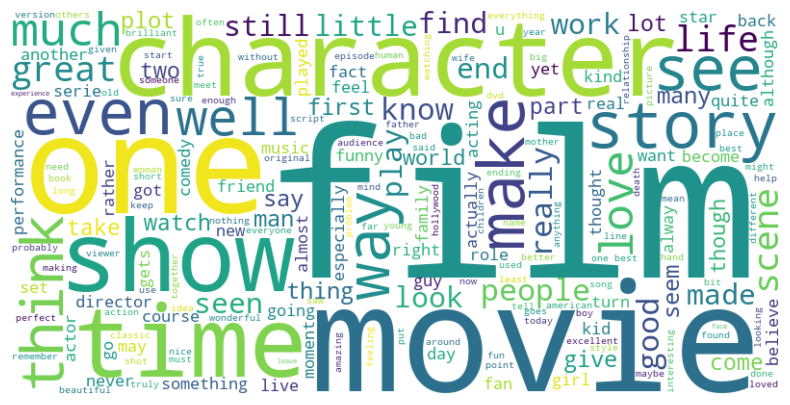

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate( ' '.join(pos_review) )
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

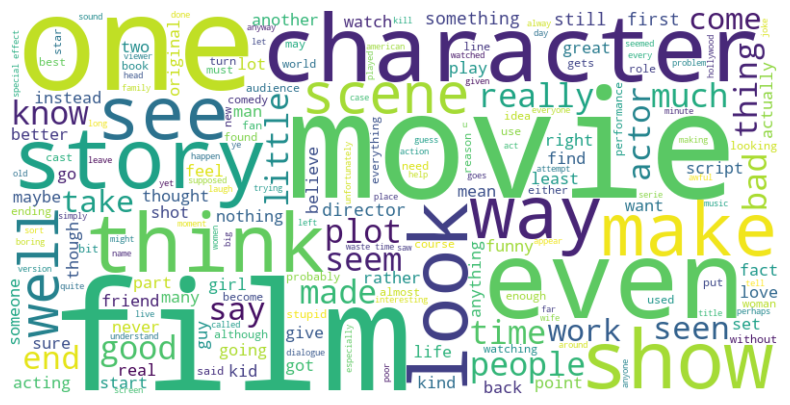

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate( ' '.join(neg_review) )
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10_000) 

X_tfidf = tfidf_vectorizer.fit_transform(df['review'])
X = X_tfidf.toarray()
# X = pd.DataFrame.sparse.from_spmatrix(X_tfidf)
Y = df['sentiment'].values

In [10]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

# x_train          , x_test         , y_train          , y_test =\
# x_train[:10_000] , x_test[:5_000] , y_train[:10_000] , y_test[:5_000]

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(16*2,activation='relu', input_shape=(10_000,) ))
model.add(Dense(8,activation='relu'))
# model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
1250/1250 [==============================] - 15s 6ms/step - loss: 0.4265 - accuracy: 0.8269 - val_loss: 0.2684 - val_accuracy: 0.8971
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3065 - accuracy: 0.8924 - val_loss: 0.2664 - val_accuracy: 0.8949
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2717 - accuracy: 0.9035 - val_loss: 0.2782 - val_accuracy: 0.8886
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2440 - accuracy: 0.9153 - val_loss: 0.3055 - val_accuracy: 0.8855
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2275 - accuracy: 0.9186 - val_loss: 0.3294 - val_accuracy: 0.8832
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2131 - accuracy: 0.9244 - val_loss: 0.3514 - val_accuracy: 0.8786
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1893 - accuracy: 0.9336 - val_loss: 0.4015 - val_accuracy

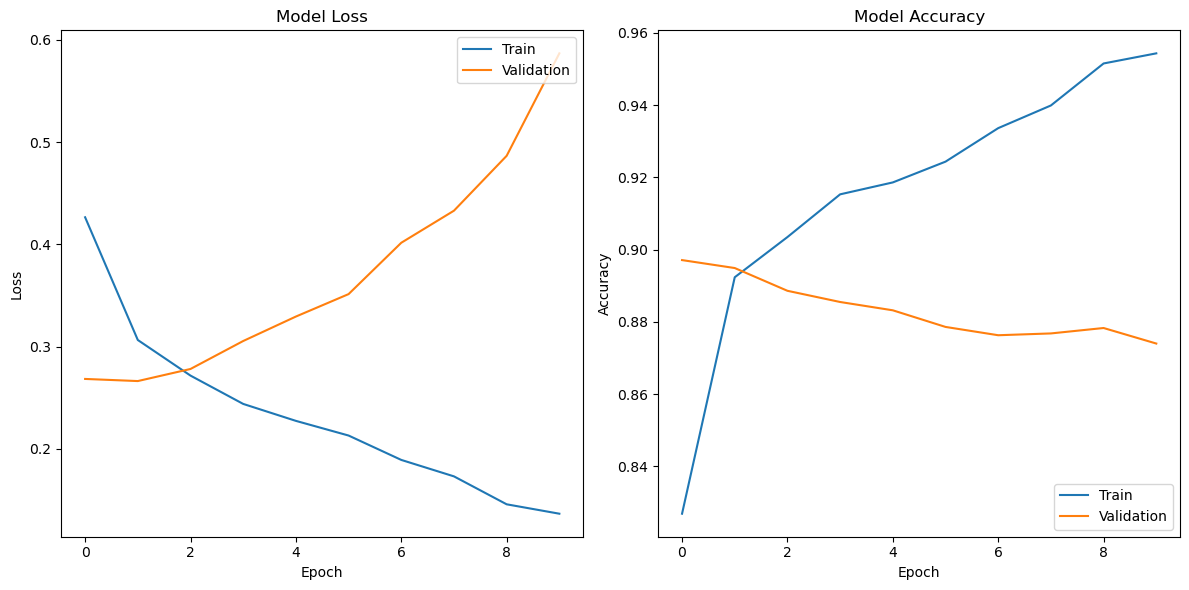

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [27]:
def predict(text):
    text = processing_text(text)
    x = tfidf_vectorizer.transform([text]).toarray()   
    pred = model.predict(x)[0]
    pred = round(pred[0])
    return pred

In [32]:
result = predict('''
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.
''')
result

1/1 [==============================] - 0s 23ms/step


1